# Creating an NLP Neural Network to Predict Price of Wine

## Flatiron School - Cohort 100719PT
## Instructor - James Irving
## By Acusio Bivona

In [1]:
import pandas as pd
df = pd.read_csv("winemag-data-130k-v2.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.isna().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [5]:
def fill_cols_na(df, column):
    
    """This function can be used to fill in columns with a literal 'N/A', if it is necessary
    
    Parameters:
    
    df - dataframe to pull columns from
    
    column - can be a single column or list of columns"""
        
    df2 = df.copy()
    
    df2[column] = df2[column].fillna('N/A')
    
    return df2

In [6]:
df = fill_cols_na(df, ['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name',
                      'taster_twitter_handle', 'variety'])

In [7]:
pd.set_option('display.max_rows', 500)

In [8]:
df['price'].value_counts()

20.0      6940
15.0      6066
25.0      5805
30.0      4951
18.0      4883
12.0      3934
40.0      3872
35.0      3801
13.0      3549
16.0      3547
10.0      3439
22.0      3357
50.0      3334
14.0      3215
45.0      3135
17.0      3053
28.0      2942
24.0      2826
19.0      2816
60.0      2277
11.0      2058
55.0      1981
32.0      1963
38.0      1728
23.0      1715
26.0      1706
65.0      1614
75.0      1403
42.0      1403
36.0      1392
29.0      1387
9.0       1339
48.0      1309
21.0      1232
27.0      1193
70.0      1100
34.0      1069
39.0       924
8.0        892
80.0       881
33.0       668
90.0       665
85.0       655
44.0       586
100.0      585
49.0       585
37.0       527
52.0       517
7.0        433
46.0       430
58.0       413
95.0       397
54.0       384
125.0      328
43.0       311
56.0       291
31.0       276
59.0       263
120.0      262
62.0       253
150.0      239
47.0       239
68.0       222
110.0      200
69.0       195
41.0       194
53.0      

In [9]:
df['price'].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [10]:
df['price'].median()

25.0

In [11]:
df['price'].mode()

0    20.0
dtype: float64

In [12]:
df['price'].fillna(df['price'].median(), inplace=True)

In [13]:
df.isna().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [14]:
cut_labels = [1, 2, 3, 4]
cut_bins = [0,10,50,200,3300]
df['Price Category'] = pd.cut(df['price'], bins=cut_bins, labels=cut_labels)

In [15]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,Price Category
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,N/A,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,N/A,N/A,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2
2,US,"Tart and snappy, the flavors of lime flesh and...",N/A,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,N/A,Alexander Peartree,N/A,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,3


In [16]:
df['Price Category'].value_counts()

2    103917
3     19092
1      6280
4       682
Name: Price Category, dtype: int64

In [17]:
df['Price Category'].dtype

CategoricalDtype(categories=[1, 2, 3, 4], ordered=True)

In [18]:
df['Price Category'] = df['Price Category'].astype('int64')

In [19]:
df.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
Price Category             int64
dtype: object

AttributeError: 'tuple' object has no attribute 'show'

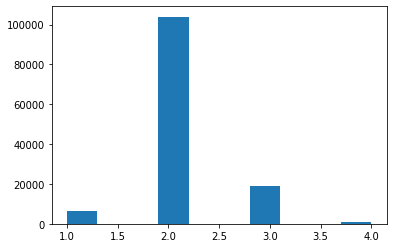

In [21]:
import matplotlib.pyplot as plt
pc_hist = plt.hist(x=df['Price Category'])
pc_hist.show()

# Fun with Word Embeddings

In [22]:
import numpy as np
np.random.seed(0)
from gensim.models import Word2Vec
from nltk import word_tokenize
from nltk import FreqDist
from nltk.corpus import stopwords
import string

In [23]:
#Model 1
data = df['description'].map(word_tokenize)

In [24]:
#Model 1
data[:5]

0    [Aromas, include, tropical, fruit, ,, broom, ,...
1    [This, is, ripe, and, fruity, ,, a, wine, that...
2    [Tart, and, snappy, ,, the, flavors, of, lime,...
3    [Pineapple, rind, ,, lemon, pith, and, orange,...
4    [Much, like, the, regular, bottling, from, 201...
Name: description, dtype: object

In [55]:
#Model 2
corpus = df['description'].to_list()
corpus[:10]

["Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",
 "This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.",
 'Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.',
 'Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.',
 "Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy count

In [56]:
#Model 2
','.join(corpus)[:100]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, "

In [57]:
#Model 2
freq = FreqDist(','.join(corpus))
freq.most_common(100)

[(' ', 5118835),
 ('e', 2679488),
 ('a', 2197359),
 ('t', 2037048),
 ('i', 1996023),
 ('n', 1802979),
 ('r', 1761599),
 ('s', 1654735),
 ('o', 1553393),
 ('l', 1186824),
 ('h', 1150459),
 ('d', 1012526),
 ('c', 773570),
 ('f', 708088),
 ('u', 643567),
 (',', 570663),
 ('y', 568010),
 ('p', 552391),
 ('m', 475065),
 ('g', 461831),
 ('b', 442672),
 ('w', 441606),
 ('.', 356148),
 ('v', 261179),
 ('k', 224636),
 ('T', 115717),
 ('-', 76476),
 ("'", 58755),
 ('x', 56419),
 ('I', 52415),
 ('0', 49078),
 ('A', 44727),
 ('2', 43243),
 ('S', 42839),
 ('C', 40715),
 ('j', 32435),
 ('D', 31837),
 ('1', 28137),
 ('M', 26631),
 ('B', 24821),
 ('F', 23260),
 ('P', 23235),
 ('z', 20012),
 ('%', 19244),
 ('R', 17730),
 ('q', 15952),
 ('G', 13576),
 ('W', 12670),
 ('V', 12445),
 ('N', 11431),
 ('L', 11052),
 ('5', 10236),
 ('H', 8314),
 ('8', 8177),
 ('O', 7839),
 ('3', 7122),
 ('7', 6481),
 ('E', 6455),
 ('9', 6377),
 ('–', 6334),
 ('6', 6088),
 ('é', 5875),
 ('4', 5629),
 ('—', 4376),
 (')', 4315),


In [58]:
#Model 2
tokens = word_tokenize(','.join(corpus))
tokens[:10]

['Aromas',
 'include',
 'tropical',
 'fruit',
 ',',
 'broom',
 ',',
 'brimstone',
 'and',
 'dried']

In [59]:
#Model 2
freq = FreqDist(tokens)
freq.most_common(100)

[(',', 569434),
 ('and', 347136),
 ('.', 224766),
 ('of', 172862),
 ('the', 168325),
 ('a', 157612),
 ('with', 115792),
 ('is', 97293),
 ('wine', 78057),
 ('this', 72852),
 ('in', 60103),
 ('flavors', 57513),
 ('to', 55303),
 ('The', 52649),
 ("'s", 51341),
 ('fruit', 43608),
 ('It', 43567),
 ('on', 42999),
 ('it', 42026),
 ('This', 41120),
 ('that', 39338),
 ('palate', 37377),
 ('aromas', 35358),
 ('acidity', 31311),
 ('from', 30013),
 ('but', 29408),
 ('tannins', 27747),
 ('cherry', 26858),
 ('are', 25950),
 ('ripe', 24845),
 ('has', 24599),
 ('black', 24415),
 ('finish', 22083),
 ('A', 21855),
 ('for', 20743),
 ('by', 20593),
 ('Drink', 20406),
 ('%', 19244),
 ('notes', 17933),
 ('spice', 17842),
 ('red', 17826),
 ('as', 17306),
 ('nose', 16862),
 ('its', 16362),
 ('rich', 15963),
 ('an', 15757),
 ('oak', 15432),
 ('berry', 15241),
 ('fresh', 15132),
 ('dry', 13724),
 ('plum', 13714),
 ('fruits', 13286),
 ('blend', 12957),
 ('finish.', 12830),
 ('offers', 12555),
 ('apple', 12397),


In [60]:
#Model 2
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [61]:
#Model 2
additional_punc = ['“','”','...','``',"''",'’',"'s"]

In [62]:
#Model 2
stopwords_list+=string.punctuation
stopwords_list.extend(additional_punc)
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [63]:
#Model 2
stopped_tokens = [word.lower() for word in tokens if word.lower() not in stopwords_list]
stopped_tokens

['aromas',
 'include',
 'tropical',
 'fruit',
 'broom',
 'brimstone',
 'dried',
 'herb',
 'palate',
 "n't",
 'overly',
 'expressive',
 'offering',
 'unripened',
 'apple',
 'citrus',
 'dried',
 'sage',
 'alongside',
 'brisk',
 'acidity.',
 'ripe',
 'fruity',
 'wine',
 'smooth',
 'still',
 'structured',
 'firm',
 'tannins',
 'filled',
 'juicy',
 'red',
 'berry',
 'fruits',
 'freshened',
 'acidity',
 'already',
 'drinkable',
 'although',
 'certainly',
 'better',
 '2016.',
 'tart',
 'snappy',
 'flavors',
 'lime',
 'flesh',
 'rind',
 'dominate',
 'green',
 'pineapple',
 'pokes',
 'crisp',
 'acidity',
 'underscoring',
 'flavors',
 'wine',
 'stainless-steel',
 'fermented.',
 'pineapple',
 'rind',
 'lemon',
 'pith',
 'orange',
 'blossom',
 'start',
 'aromas',
 'palate',
 'bit',
 'opulent',
 'notes',
 'honey-drizzled',
 'guava',
 'mango',
 'giving',
 'way',
 'slightly',
 'astringent',
 'semidry',
 'finish.',
 'much',
 'like',
 'regular',
 'bottling',
 '2012',
 'comes',
 'across',
 'rather',
 'r

In [64]:
#Model 2
freq = FreqDist(stopped_tokens)
freq.most_common(100)

[('wine', 78233),
 ('flavors', 59986),
 ('fruit', 43832),
 ('aromas', 39546),
 ('palate', 37381),
 ('acidity', 31739),
 ('tannins', 28098),
 ('drink', 27868),
 ('cherry', 27238),
 ('ripe', 26904),
 ('black', 25379),
 ('finish', 22086),
 ('red', 18729),
 ('notes', 18399),
 ('spice', 18135),
 ('rich', 17186),
 ('nose', 16875),
 ('fresh', 16671),
 ('oak', 15860),
 ('berry', 15435),
 ('dry', 15103),
 ('plum', 14061),
 ('soft', 13410),
 ('fruits', 13288),
 ('blend', 12974),
 ('finish.', 12830),
 ('apple', 12718),
 ('offers', 12660),
 ('blackberry', 12657),
 ('crisp', 12639),
 ('white', 12241),
 ('sweet', 12173),
 ('texture', 11562),
 ('shows', 11510),
 ('dark', 11322),
 ('light', 11307),
 ('citrus', 11238),
 ('bright', 10869),
 ('cabernet', 10447),
 ('vanilla', 10441),
 ('well', 10224),
 ('full', 10069),
 ('juicy', 9700),
 ('pepper', 9588),
 ('fruity', 9368),
 ('good', 9357),
 ('raspberry', 9243),
 ('firm', 9124),
 ('green', 8951),
 ('touch', 8447),
 ('peach', 8432),
 ('lemon', 8410),
 ('ch

In [25]:
#Model 1
model = Word2Vec(data, size=100, window=5, min_count=1, workers=4)

In [65]:
#Model 2
model = Word2Vec([stopped_tokens], size=100, window=5, min_count=1, workers=4)

In [26]:
#Model 1
model.train(data, total_examples=model.corpus_count, epochs=10)

(41025785, 61357260)

In [66]:
#Model 2
model.train([stopped_tokens], total_examples=model.corpus_count, epochs=10)

(100000, 32518830)

In [27]:
#Model 1
wv = model.wv

In [67]:
#Model 2
wv = model.wv

In [28]:
#Model 1
wv.most_similar('Aromas')

[('Notes', 0.8065941333770752),
 ('Scents', 0.7904120683670044),
 ('Touches', 0.7267212271690369),
 ('Flavors', 0.7266938090324402),
 ('Hints', 0.7152518630027771),
 ('Highlights', 0.6811310648918152),
 ('Layers', 0.6666620969772339),
 ('aromas', 0.6483620405197144),
 ('Accents', 0.6184842586517334),
 ('Whiffs', 0.5952425003051758)]

In [68]:
#Model 2
wv.most_similar('wine')

[('flavors', 0.9999605417251587),
 ('aromas', 0.9999589323997498),
 ('palate', 0.9999567270278931),
 ('fresh', 0.9999556541442871),
 ('notes', 0.9999524354934692),
 ('finish', 0.9999516010284424),
 ('acidity', 0.9999514818191528),
 ('fruit', 0.9999512434005737),
 ('rich', 0.9999507665634155),
 ('long', 0.999945342540741)]

In [29]:
#Model 1
wv['Aromas']

array([-2.8454772e-01, -4.9646276e-01, -4.1607366e+00,  1.3687874e+00,
        3.7103353e+00, -2.2572200e+00,  1.5280840e+00,  1.0774952e+01,
        5.8199108e-01,  3.9913079e-01,  5.0573599e-01,  5.7638831e+00,
       -1.0738858e+00,  3.5575392e+00, -1.4113132e+00, -3.9413726e+00,
       -4.4100223e+00,  2.3618758e+00,  2.4368601e+00,  2.9416436e-01,
       -1.1382991e+00, -1.4160022e+00, -1.0194013e+00,  4.4622931e+00,
        4.9901233e+00, -5.4468638e-01, -1.0721319e+00, -1.8607612e+00,
       -3.3467453e+00, -4.8381205e+00,  4.0050812e+00,  4.5586586e+00,
        5.3959908e+00,  1.1704580e+00, -2.9011128e+00,  1.8712484e+00,
        6.7603850e-01, -3.1047711e-01,  2.6159806e+00,  5.1789899e+00,
       -4.3956556e+00, -3.6152303e-02,  2.3022845e-01,  7.7908570e-01,
        1.0570222e+00,  1.0256631e+00, -3.3134811e+00, -2.3461936e+00,
        3.5431964e+00, -2.5050921e+00,  1.4910073e+00,  2.3028243e+00,
        4.0623903e+00, -1.4807061e+00,  1.3853774e+00, -9.5884657e-01,
      

In [69]:
#Model 2
wv['wine']

array([-7.28988290e-01,  5.89181244e-01, -4.20181185e-01,  6.79549158e-01,
       -5.61286092e-01, -3.03451627e-01, -1.66687425e-02, -5.53961247e-02,
        2.15241551e-01,  8.15211535e-01, -3.36894304e-01, -8.51017296e-01,
       -5.23345947e-01, -1.52614221e-01, -1.26449871e+00, -1.87686563e-01,
        1.13376394e-01,  4.30480361e-01,  5.14692307e-01, -3.60265654e-03,
       -2.00087711e-01,  4.17635232e-01,  4.30520289e-02, -6.54390872e-01,
       -7.38561824e-02, -7.61514843e-01, -2.91326940e-01, -4.29191977e-01,
       -1.50086150e-01, -5.44779003e-04, -2.33520828e-02,  1.39292732e-01,
       -3.78958672e-01,  1.95481911e-01, -6.60543323e-01, -5.05610049e-01,
        3.51299405e-01,  1.43056020e-01, -2.39997923e-01, -1.05621195e+00,
        3.27203989e-01,  1.92553774e-01, -4.11055326e-01,  1.60443261e-01,
        8.49295974e-01, -3.77539128e-01,  2.63945073e-01,  7.00588882e-01,
        7.89521456e-01,  1.42790228e-01, -4.34528619e-01,  2.16291085e-01,
        3.89513433e-01,  

In [30]:
#Model 1
wv.vectors

array([[-2.7985141e-01,  2.9602352e-01, -1.5445307e+00, ...,
        -1.1343012e+00,  1.9518315e+00, -9.7611606e-01],
       [ 5.9382135e-01, -5.2232675e-02, -5.8637893e-01, ...,
         7.7536911e-01,  1.1432698e+00,  1.5821687e+00],
       [-1.5910634e+00,  2.4604274e-01, -1.3907577e+00, ...,
        -1.3064194e+00,  2.3976212e+00, -6.9682693e-01],
       ...,
       [ 4.1693710e-02, -7.1414458e-03,  4.7542807e-02, ...,
         1.5803667e-02, -5.0320905e-03,  5.4156035e-02],
       [ 4.1727621e-02, -1.5584046e-03,  1.0024369e-01, ...,
         1.4103501e-01, -2.5418842e-02,  1.2796254e-02],
       [ 3.8580362e-02,  5.5177845e-02,  1.3666784e-02, ...,
        -1.0357072e-02,  5.6253565e-03,  7.9172308e-04]], dtype=float32)

In [70]:
#Model 2
wv.vectors

array([[-7.2898829e-01,  5.8918124e-01, -4.2018119e-01, ...,
        -6.0608917e-01, -5.7595038e-01, -2.0368904e-01],
       [-6.6605896e-01,  5.3329480e-01, -3.7432432e-01, ...,
        -5.4986542e-01, -5.2854866e-01, -1.8777938e-01],
       [-6.0834283e-01,  4.9009115e-01, -3.4383330e-01, ...,
        -4.9553579e-01, -4.8041889e-01, -1.6588880e-01],
       ...,
       [ 3.7508595e-03, -2.4629305e-03,  1.9838421e-03, ...,
         3.8793008e-03,  4.9809683e-03,  2.8974307e-03],
       [-1.6139228e-03,  2.0733212e-04,  3.0159059e-03, ...,
         2.2480378e-03, -1.4378247e-03,  3.5166260e-04],
       [-3.3727317e-04, -8.2688195e-05,  2.9322866e-03, ...,
        -9.9405111e-04, -4.0982985e-03,  4.1952282e-03]], dtype=float32)

In [31]:
#Model 1
wv.most_similar(positive=['Aromas', 'Notes'], negative=['Scents'])

[('Flavors', 0.7498737573623657),
 ('Touches', 0.7128608226776123),
 ('Hints', 0.7040060758590698),
 ('Layers', 0.6173896789550781),
 ('Highlights', 0.5982887148857117),
 ('Accents', 0.5878312587738037),
 ('Tones', 0.5302862524986267),
 ('Its', 0.5239870548248291),
 ('Cola', 0.5220677852630615),
 ('aromas', 0.5202503204345703)]

In [71]:
#Model 2
wv.most_similar(positive=['wine', 'flavors'], negative=['finish'])

[('aromas', 0.999920129776001),
 ('notes', 0.9999077916145325),
 ('fruit', 0.9999011158943176),
 ('palate', 0.9998993277549744),
 ('rich', 0.9998965859413147),
 ('fresh', 0.9998900890350342),
 ('acidity', 0.9998890161514282),
 ('long', 0.9998889565467834),
 ('berry', 0.9998863935470581),
 ('nose', 0.999883234500885)]

# Neural Network

In [32]:
target = df['Price Category']

In [33]:
#Model 1
total_vocabulary = set(word for description in data for word in description)

In [ ]:
#Model 2
#total_vocabulary = set(word for description in stopped_tokens/corpus? for word in description)

In [34]:
#Model 1
len(total_vocabulary)
print('There are {} unique tokens in the dataset.'.format(len(total_vocabulary)))

There are 51780 unique tokens in the dataset.


In [ ]:
#Model 2
len(total_vocabulary)
print('There are {} unique tokens in the dataset.'.format(len(total_vocabulary)))

In [35]:
#Model 1
glove = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [ ]:
#Model 2
glove = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector

In [36]:
glove['aromas']

array([ 1.093   ,  0.65613 , -1.5218  ,  0.69799 ,  0.61011 ,  0.25169 ,
        0.03538 , -0.53179 ,  0.13368 ,  1.57    , -0.38117 ,  0.010478,
        1.1387  , -0.38847 , -0.18242 ,  0.16008 , -0.39453 ,  0.025334,
        0.4808  , -1.7512  , -0.38028 ,  0.52807 ,  0.8787  , -0.47349 ,
       -0.23939 ,  1.2645  , -0.39373 ,  1.4757  ,  0.78596 , -0.51365 ,
        0.62215 , -0.10212 , -0.11154 , -0.036182,  1.4312  , -0.11613 ,
       -1.5928  ,  0.10555 ,  0.7415  , -0.34381 ,  0.058573,  0.22099 ,
       -0.089933, -0.56413 ,  0.96937 ,  1.1901  ,  1.0556  , -0.067241,
       -0.75956 , -0.22039 ], dtype=float32)

In [ ]:
glove['wine']

In [37]:
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [38]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

In [39]:
#Model 1
y = to_categorical(target)
X = df['description']

In [ ]:
#Model 2
y = to_categorical(target)
#X = stopped_tokens/corpus?

In [40]:
#Model 1
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

In [ ]:
#Model 2
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)

In [41]:
#Model 1
X_train

105737    88-90 Barrel sample. Very soft, rounded wine, ...
52637     One of Faiveley's monopoles (wholly owned vine...
121292    This Bordeaux-style blend is fresh, showing ar...
106545    Aromas include black berries, coffee, espresso...
126506    Young and vigorous now, marked by tannins and ...
                                ...                        
46670     Black fruit aromas show over toasted vanilla a...
111406    Aromas of fresh cantaloupe melon and apricots,...
20379     Solid, ripe, perfumed and tannic, this is a co...
49605     With its expressive notes of espressso and bla...
51444     From parcels around the village of Maimbray, t...
Name: description, Length: 97478, dtype: object

In [ ]:
#Model 2
X_train

In [42]:
#Model 1
y_train

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
#Model 2
y_train

In [43]:
#Model 1
y_test

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
#Model 2
y_test

In [44]:
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_tr = sequence.pad_sequences(X_train_seq, maxlen=100)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_te = sequence.pad_sequences(X_test_seq, maxlen=100)

In [45]:
#Model 1
embedding_size = 128
model = Sequential()
model.add(Embedding(20000, embedding_size)) #input_length=100?
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 25)          15400     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 25)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                1300      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 255       
Total para

In [ ]:
#Model 2
embedding_size = 128
model = Sequential()
model.add(Embedding(20000, embedding_size)) #input_length=100?
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model.summary()

In [46]:
model_1 = model.fit(X_tr, y_train, epochs=3, batch_size=128, validation_split=0.3)

Train on 68234 samples, validate on 29244 samples
Epoch 1/3
68234/68234 [==============================] - 68s 999us/step - loss: 0.7355 - acc: 0.7755 - val_loss: 0.5406 - val_acc: 0.8004
Epoch 2/3
68234/68234 [==============================] - 66s 971us/step - loss: 0.5504 - acc: 0.7994 - val_loss: 0.5083 - val_acc: 0.8004
Epoch 3/3
68234/68234 [==============================] - 63s 926us/step - loss: 0.5037 - acc: 0.8063 - val_loss: 0.5010 - val_acc: 0.8125


In [ ]:
model_2 = model.fit(X_tr, y_train, epochs=3, batch_size=128, validation_split=0.3)

In [47]:
#Model 1
y_hat_test = model.predict(X_te)
y_hat_test

array([[2.1163463e-05, 1.4354082e-02, 9.9128073e-01, 2.5182551e-01,
        4.9337628e-03],
       [7.2505786e-06, 1.9325461e-04, 8.3761376e-01, 9.1981906e-01,
        7.8036778e-02],
       [8.3553681e-07, 1.2669052e-02, 9.9913800e-01, 7.6963849e-02,
        2.2124355e-04],
       ...,
       [1.7269737e-07, 3.2510310e-02, 9.9983585e-01, 1.8551691e-02,
        1.7905861e-05],
       [8.8934121e-06, 7.5249918e-02, 9.9856001e-01, 5.0534748e-02,
        3.5000488e-04],
       [7.9983518e-05, 8.1394427e-03, 9.6457791e-01, 5.0883985e-01,
        2.4896331e-02]], dtype=float32)

In [ ]:
#Model 2
y_hat_test = model.predict(X_te)
y_hat_test

In [48]:
#Model 1
y_hat_test = y_hat_test.argmax(axis=1)#.shape)
y_hat_test

array([2, 3, 2, ..., 2, 2, 2])

In [ ]:
#Model 2
y_hat_test = y_hat_test.argmax(axis=1)#.shape)
y_hat_test

In [49]:
def plot_confusion_matrix(conf_matrix, classes = None, normalize=True,
                          title='Confusion Matrix', cmap="Blues",
                          print_raw_matrix=False,
                          fig_size=(4,4)):
    """Check if Normalization Option is Set to True. 
    If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.
    Note: Taken from bs_ds and modified
    - Can pass a tuple of (y_true,y_pred) instead of conf matrix.
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    
    ## make confusion matrix if given tuple of y_true,y_pred
    if isinstance(conf_matrix, tuple):
        y_true = conf_matrix[0].copy()
        y_pred = conf_matrix[1].copy()
        
        if y_true.ndim>1:
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
            
            
        cm = metrics.confusion_matrix(y_true,y_pred)
    else:
        cm = conf_matrix
        
    ## Generate integer labels for classes
    if classes is None:
        classes = list(range(len(cm)))  
        
    ## Normalize data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt='.2f'
    else:
        fmt= 'd'
        
        
    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
    #             'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()

    tick_marks = classes#np.arange(len(classes))

    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

    # Determine threshold for b/w text
    thresh = cm.max() / 2.

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color='darkgray',**fontDict['data_labels']) #color="white" if cm[i, j] > thresh else "black"

    plt.tight_layout()
    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])

    if print_raw_matrix:
        print_title = 'Raw Confusion Matrix Counts:'
        print('\n',print_title)
        print(conf_matrix)


    fig = plt.gcf()
    return fig



def plot_keras_history(history,figsize_1=(6,4),
    figsize_2=(8,6)):
    """Plots keras history and returns fig"""
    
    ## Make a df from history
    if isinstance(history,dict)==False:
        history=history.history
    plot_df = pd.DataFrame(history)
    plot_df['Epoch'] = range(1,len(plot_df)+1)
    plot_df.set_index('Epoch',inplace=True)
    ## Get cols for acc vs loss
    acc_cols = list(filter(lambda x: 'acc' in x, plot_df.columns))
    loss_cols = list(filter(lambda x: 'loss' in x, plot_df.columns))   
    
    ## Set figsizes based on number of keys
    if len(acc_cols)>1:
        figsize=figsize_2
    else:
        figsize=figsize_1

    ## Make figure and axes
    fig,ax = plt.subplots(nrows=2,figsize=figsize,sharex=True)
    
    ## Plot Accuracy cols in plot 1
    plot_df[acc_cols].plot(ax=ax[0])
    ax[0].set(ylabel='Accuracy')
    ax[0].set_title('Training Results')

    ## Plot loss cols in plot 2
    plot_df[loss_cols].plot(ax=ax[1])
    ax[1].set(ylabel='Loss')
    ax[1].set_xlabel('Epoch #')


#     ## Change xaxis locators 
#     [a.xaxis.set_major_locator(mpl.ticker.MaxNLocator(len(plot_df),integer=True)) for a in ax]
#     [a.set_xlim((1,len(plot_df)+1)) for a in ax]
    plt.tight_layout()
    
    return fig

In [50]:
def evaluate_model(y_true, y_pred,history=None):
    """Evaluates neural network using sklearn metrics"""
    from sklearn import metrics
    if y_true.ndim>1:
        y_true = y_true.argmax(axis=1)
    if y_pred.ndim>1:
        y_pred = y_pred.argmax(axis=1)   
#     try:    
    if history is not None:
        plot_keras_history(history)
        plt.show()
#     except:
#         pass
    
    num_dashes=20
    print('\n')
    print('---'*num_dashes)
    print('\tCLASSIFICATION REPORT:')
    print('---'*num_dashes)
    try:
        print(metrics.classification_report(y_true,y_pred))
        
        fig = plot_confusion_matrix((y_true,y_pred))
        plt.show()
    except Exception as e:
        print(f"[!] Error during model evaluation:\n\t{e}")



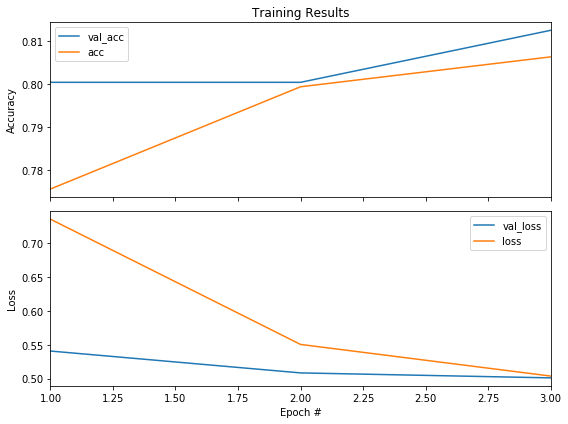



------------------------------------------------------------
	CLASSIFICATION REPORT:
------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1570
           2       0.83      0.96      0.89     25979
           3       0.56      0.28      0.37      4773
           4       0.00      0.00      0.00       171

    accuracy                           0.81     32493
   macro avg       0.35      0.31      0.31     32493
weighted avg       0.75      0.81      0.77     32493



/Users/acusiobivona/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


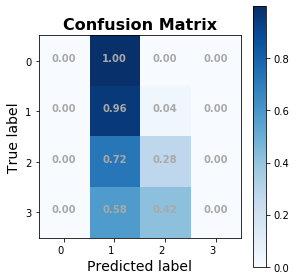

In [51]:
evaluate_model(y_test, y_hat_test, model_1)

In [ ]:
evaluate_model(y_test, y_hat_test, model_2)

(-0.5, 399.5, 199.5, -0.5)

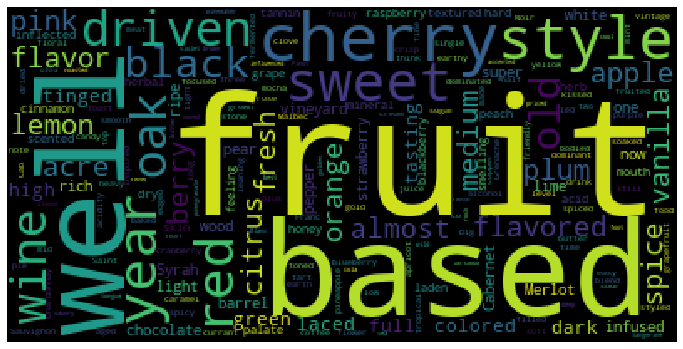

In [52]:
#Model 1
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=None,collocations=False)
wordcloud.generate(','.join(total_vocabulary))
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off')

In [ ]:
#Model 2
wordcloud = WordCloud(stopwords=None,collocations=False)
wordcloud.generate(','.join(stopped_tokens))
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off')

In [53]:
#Model 1
import nltk
bigram_measures = nltk.collocations.BigramAssocMeasures()
word_finder = nltk.BigramCollocationFinder.from_words(total_vocabulary)

words_scored = word_finder.score_ngrams(bigram_measures.raw_freq)
top_words = pd.DataFrame.from_records(words_scored,columns=['Words','Frequency']).head(20)
top_words

,Words,Frequency
0,"(!, factor)",0.000019
1,"(#, necessitates)",0.000019
2,"($, Livio)",0.000019
3,"(%, coffee/toasty)",0.000019
4,"(&, sandy)",0.000019
5,"(', Jérémy)",0.000019
6,"('', dried-cherry)",0.000019
7,"('01, messy)",0.000019
8,"('02, lemonade-flavored)",0.000019
9,"('03, vineyards—Mark)",0.000019


In [ ]:
#Model 2
bigram_measures = nltk.collocations.BigramAssocMeasures()
word_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)

words_scored = word_finder.score_ngrams(bigram_measures.raw_freq)
top_words = pd.DataFrame.from_records(words_scored,columns=['Words','Frequency']).head(20)
top_words

In [54]:
#Model 1
bigram_measures = nltk.collocations.BigramAssocMeasures()

word_pmi_finder = nltk.BigramCollocationFinder.from_words(total_vocabulary)
word_pmi_finder.apply_freq_filter(1)

word_pmi_scored = word_pmi_finder.score_ngrams(bigram_measures.pmi)
pd.DataFrame.from_records(word_pmi_scored,columns=['Words','PMI']).head(20)

,Words,PMI
0,"(!, factor)",15.660107
1,"(#, necessitates)",15.660107
2,"($, Livio)",15.660107
3,"(%, coffee/toasty)",15.660107
4,"(&, sandy)",15.660107
5,"(', Jérémy)",15.660107
6,"('', dried-cherry)",15.660107
7,"('01, messy)",15.660107
8,"('02, lemonade-flavored)",15.660107
9,"('03, vineyards—Mark)",15.660107


In [ ]:
#Model 2
bigram_measures = nltk.collocations.BigramAssocMeasures()

word_pmi_finder = nltk.BigramCollocationFinder.from_words(stopped_vocabulary)
word_pmi_finder.apply_freq_filter(5)

word_pmi_scored = word_pmi_finder.score_ngrams(bigram_measures.pmi)
pd.DataFrame.from_records(word_pmi_scored,columns=['Words','PMI']).head(20)